In [35]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/home/elvin/Desktop/MachineLearning/datasets/IRIS.csv")

In [7]:
set(df["species"])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [8]:
# Set
a = [1,4,5,6,5,1]

In [12]:
a = set(a)
print(a)

{1, 4, 5, 6}


In [10]:
b = set([4,5,8,9])

In [29]:
x_data = df.iloc[:,:4].to_numpy()
y_data = df.iloc[:,4].to_numpy()

In [40]:
class_name = set(y_data)

In [44]:
class_dict = {i:j for (j,i) in enumerate(class_name)}

In [46]:
class_dict

{'Iris-virginica': 0, 'Iris-versicolor': 1, 'Iris-setosa': 2}

In [55]:
y_data = df.replace({"species" : class_dict}).iloc[:,4].to_numpy()

In [58]:
from sklearn.cluster import KMeans

In [69]:
model = KMeans(n_clusters=3)

In [71]:
model.fit_predict(x_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [73]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [74]:
model = GaussianProcessClassifier()

In [75]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data)

In [96]:
model.fit(x_train,y_train)

GaussianProcessClassifier()

In [97]:
model.predict(x_test)

array([0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1])

In [98]:
y_test

array([0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1])

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [99]:
confusion_matrix(y_test,model.predict(x_test))

array([[17,  0,  0],
       [ 1,  9,  0],
       [ 0,  0, 11]])

In [100]:
accuracy_score(y_test,model.predict(x_test))

0.9736842105263158

In [101]:
from sklearn.neural_network import MLPClassifier

In [111]:
model = MLPClassifier(hidden_layer_sizes=20,max_iter=1000)

In [112]:
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=20, max_iter=1000)

In [113]:
model.predict(x_test)

array([0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1])

In [114]:
y_test

array([0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1])

In [115]:
confusion_matrix(y_test,model.predict(x_test))

array([[17,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 11]])

In [116]:
accuracy_score(y_test,model.predict(x_test))

1.0

In [60]:
from sklearn.decomposition import PCA

In [117]:
model = PCA(n_components=2)

In [119]:
new_xdata= model.fit_transform(x_data)

In [120]:
import matplotlib.pyplot as plt

In [128]:
c = ["r","b","y"]

In [134]:
points_class_0 = new_xdata[y_data == 0]
points_class_1 = new_xdata[y_data == 1]
points_class_2 = new_xdata[y_data == 2]

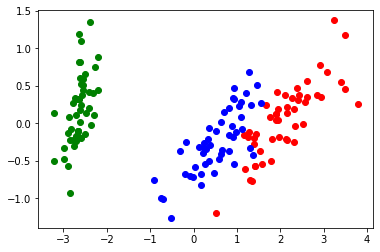

In [141]:
plt.scatter(points_class_0[:,0],points_class_0[:,1],color="r")
plt.scatter(points_class_1[:,0],points_class_1[:,1],color="b")
plt.scatter(points_class_2[:,0],points_class_2[:,1],color="g")

In [142]:
import pickle

In [143]:
with open("/home/elvin/Desktop/kenkyuu/data/mnist/mnist_test_images.pkl","rb") as f:
    images = pickle.load(f)

In [144]:
with open("/home/elvin/Desktop/kenkyuu/data/mnist/mnist_test_label.pkl","rb") as f:
    labels = pickle.load(f)

In [146]:
images = images.reshape((-1,28*28))

In [153]:
colors = ["b","r","g","orange","y","c","m","purple","pink","brown"]

In [156]:
model = PCA(n_components=2)

In [157]:
images = model.fit_transform(images)

In [158]:
images

array([[-411.26034074, -686.55485801],
       [  58.06938942,  983.17301129],
       [-935.10493664,  459.0541778 ],
       ...,
       [-282.41875731, -550.82902738],
       [-287.27188904,  155.88967913],
       [1144.17153242,   22.70004065]])

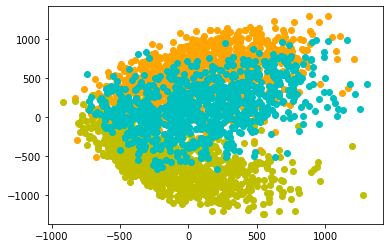

In [164]:
for i in range(3,6):
    tmp = images[labels == i]
    plt.scatter(tmp[:,0],tmp[:,1],color=colors[i])